In [1]:
from time import time
import numpy as np
import keras.backend as K
from tensorflow.keras.layers import Layer, InputSpec
from keras.models import Model
from keras.utils.vis_utils import plot_model
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
import numpy as np
from random import randint
import os
import matplotlib.pyplot as plt

import tensorflow_addons as tfa
import plotting_funcs as pf
import clustering_model as cm

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [2]:
X = np.load('../npy_files/features_All32.npy')
y = np.load('../npy_files/labels_All32.npy')
types = np.load('../npy_files/celltypes_All32.npy')
y_letter = np.array([well[:1] for well in y])
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
labs = le.fit_transform(y)
labs_by_letter = le.fit_transform(y_letter)
print(len(X),len(y))
X_train, y_train = X, labs
X_train.shape

4600 4600


(4600, 32, 5)

In [3]:
# #cut area column
# x_cut = np.delete(X, 2, 2)
# X_train = x_cut.copy()
# X_train.shape

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_train.shape[1]

32

In [5]:
X_train = X_train.reshape(X_train.shape[0],int(X_train.shape[1]/4),4,X_train.shape[2])
X_train.shape

(4600, 8, 4, 5)

In [6]:
input_shape = X_train.shape[1:]

print(input_shape)

(8, 4, 5)


In [8]:
import clustering_model as cm
cae = cm.ae_conv(input_shape)

ValueError: Exception encountered when calling layer "reshape_1" (type Reshape).

total size of new array must be unchanged, input_shape = [256], output_shape = [2, 1, 8]

Call arguments received by layer "reshape_1" (type Reshape):
  • inputs=tf.Tensor(shape=(None, 256), dtype=float32)

In [21]:
epochs = 50
batch_size = 128
cae.compile(optimizer='adam', loss='mse')

cae.fit(X_train, X_train, batch_size=batch_size, epochs=epochs)

Epoch 1/50


ValueError: in user code:

    File "/Users/amosavni/Library/Python/3.8/lib/python/site-packages/keras/engine/training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "/Users/amosavni/Library/Python/3.8/lib/python/site-packages/keras/engine/training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/amosavni/Library/Python/3.8/lib/python/site-packages/keras/engine/training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "/Users/amosavni/Library/Python/3.8/lib/python/site-packages/keras/engine/training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/amosavni/Library/Python/3.8/lib/python/site-packages/keras/engine/training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "/Users/amosavni/Library/Python/3.8/lib/python/site-packages/keras/engine/compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/amosavni/Library/Python/3.8/lib/python/site-packages/keras/losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/amosavni/Library/Python/3.8/lib/python/site-packages/keras/losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/amosavni/Library/Python/3.8/lib/python/site-packages/keras/losses.py", line 1327, in mean_squared_error
        return backend.mean(tf.math.squared_difference(y_pred, y_true), axis=-1)

    ValueError: Dimensions must be equal, but are 16 and 2 for '{{node mean_squared_error/SquaredDifference}} = SquaredDifference[T=DT_FLOAT](sequential_5/deconv1/BiasAdd, IteratorGetNext:1)' with input shapes: [?,16,16,5], [?,16,2,5].


1/1 [==============================] - 0s 191ms/step


/var/folders/s6/khx_n6gj1fgfgkzsbv62f8sw0000gn/T/ipykernel_60346/1048437228.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


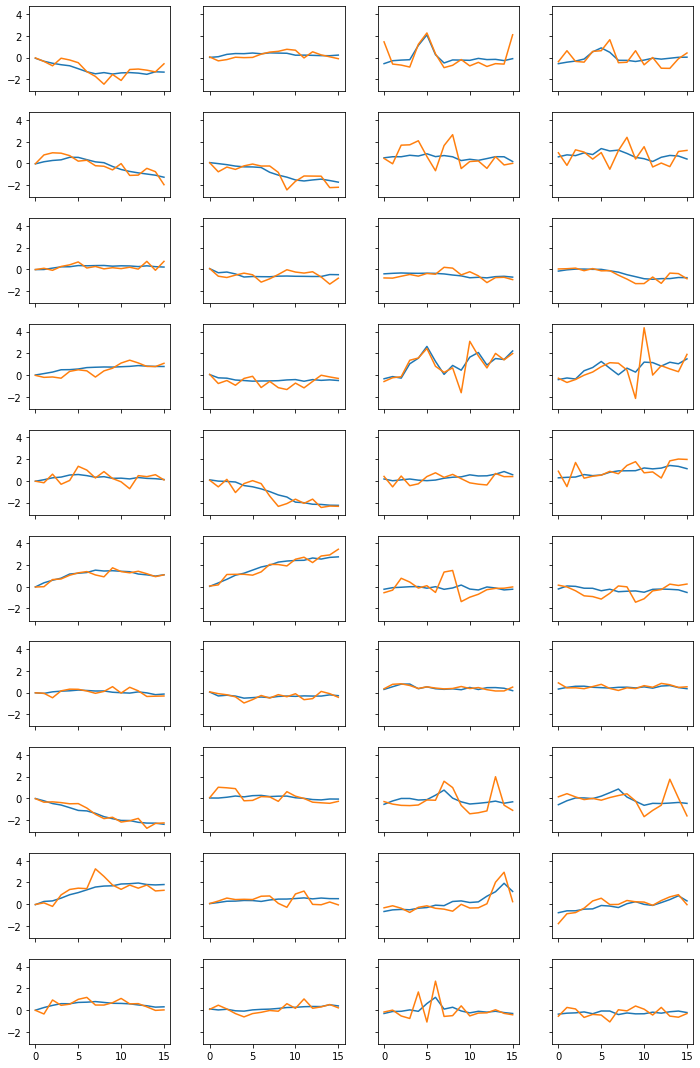

In [21]:
size = 10
rand_idx = np.random.choice(X_train.shape[0], size, replace=False)

orig_vec = X_train[rand_idx,:,:]
orig_list = orig_vec.reshape(orig_vec.shape[0],16,4)

pred_vec = cae.predict(orig_vec)
pred_list = pred_vec.reshape(pred_vec.shape[0],16,4)

plot_autoencoder_by_time(orig_list,pred_list)